***
#### Importing Libraries
***

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle

In [2]:
!pip install scikit-fuzzy

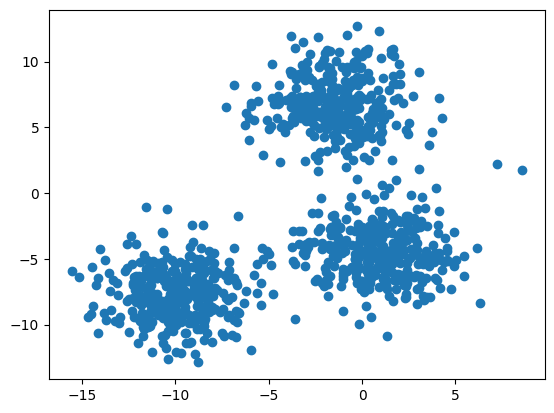

In [15]:
x,_ = make_blobs(n_samples=1000,n_features=2,centers=3, cluster_std=2,random_state=100)
plt.scatter(x[:,0],x[:,1])

In [4]:
import skfuzzy as fuzzy 
from matplotlib.patches import Circle

In [5]:
cntr, u, u0,d,jm,p, fpc  = fuzzy.cluster.cmeans(x.T,c=3,m=2,error=0.005,maxiter=1000)
u

array([[0.04178159, 0.00327243, 0.03257875, ..., 0.05084206, 0.643486  ,
        0.84251157],
       [0.01680133, 0.00154171, 0.01811821, ..., 0.92032817, 0.15725665,
        0.09474451],
       [0.94141709, 0.99518586, 0.94930304, ..., 0.02882977, 0.19925736,
        0.06274392]])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16180\295331398.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],c=u.T,cmap='Reds')


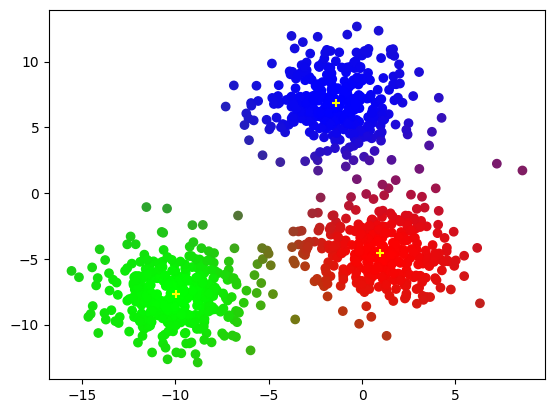

In [16]:
plt.scatter(x[:,0],x[:,1],c=u.T,cmap='Reds')
plt.scatter(cntr[:,0],cntr[:,1],marker="+",color='yellow')

In [7]:
cntr

array([[ 0.95602995, -4.56136816],
       [-9.95520805, -7.6859237 ],
       [-1.41315259,  6.84418143]])

In [8]:
radii = []
for i in range(cntr.shape[0]):
    weights = u[i]  # fuzzy membership of each point in cluster i
    weighted_squared_dist = weights * d[i]**2
    radius = np.sqrt(np.sum(weighted_squared_dist) / np.sum(weights))
    radii.append(radius)
radii

[4.545905107020167, 4.533936562075655, 4.5300859249564915]

In [14]:
x

-9.95520804590373

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16180\1893521934.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle.append(Circle((cntr[i,0], cntr[i,1]), radii[i], color='black', alpha=0.3, edgecolor='black'))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16180\1893521934.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],c=u.T,cmap='Reds')


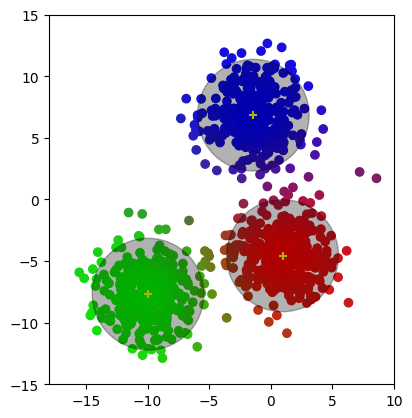

In [29]:

fig, ax = plt.subplots()
circle = []
for i in range(3):
    circle.append(Circle((cntr[i,0], cntr[i,1]), radii[i], color='black', alpha=0.3, edgecolor='black'))
plt.scatter(x[:,0],x[:,1],c=u.T,cmap='Reds')
plt.scatter(cntr[:,0],cntr[:,1],marker="+",color='yellow')
ax.add_patch(circle[0])
ax.add_patch(circle[1])
ax.add_patch(circle[2])


# Optional: Set axes limits and equal aspect
ax.set_xlim(-18,10)
ax.set_ylim(-15,15)
ax.set_aspect('equal')

plt.show()
